In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import pdb
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import time
import glob
import pickle
import pandas as pd
from tqdm import tqdm
from sklearn.linear_model import LinearRegression

In [3]:
import itertools
from sklearn.model_selection import KFold

In [4]:
import sys
sys.path.append('../..')
from loaders import load_sabes, load_peanut
from utils import apply_df_filters, calc_loadings
from dca_research.kca import KalmanComponentsAnalysis as KCA

In [5]:
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from dca.dca import DynamicalComponentsAnalysis as DCA
from dca.cov_util import calc_pi_from_data, calc_cross_cov_mats_from_data, calc_pi_from_cross_cov_mats
from pyuoi.linear_model.var import VAR
from neurosim.models.var import form_companion

In [6]:
from decoders import lr_decoder

### Sabes

In [16]:
# Compare performance with and without filtering of low firing neurons
data_files = glob.glob('/mnt/Secondary/data/sabes/*.mat')

In [18]:
# Run on a few different dimensions to get the minimum distance to orthogonal matrix
dim_vals = np.arange(2, 11)
d_orth_sabes = np.zeros((len(data_files), dim_vals.size, 2))
for i, data_file in tqdm(enumerate(data_files)):
    dat = load_sabes(data_file)        
    X = np.squeeze(dat['spike_rates'])
    for j, dim in enumerate(dim_vals):
        dcamodel = DCA(T=5, d=dim)
        dcamodel.fit(X)
        pcamodel = PCA().fit(X)

        Xdca = X @ dcamodel.coef_
        Xpca = X @ pcamodel.components_.T[:, 0:dim]

        varmodel = VAR(estimator='ols', order=1)
        varmodel.fit(Xdca)
        A = form_companion(varmodel.coef_)
        U, S, Vh = np.linalg.svd(A)
        d_orth_sabes[i, j, 0] = np.linalg.norm(A - U @ Vh)
    
        varmodel = VAR(estimator='ols', order=1)
        varmodel.fit(Xpca)

        A = form_companion(varmodel.coef_)
        U, S, Vh = np.linalg.svd(A)
        d_orth_sabes[i, j, 1] = np.linalg.norm(A - U @ Vh)


0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [00:16<00:00, 16.32s/it]
Rows of VAR matrix processed: 2it [00:00, 1511.73it/s]
Rows of VAR matrix processed: 2it [00:00, 1937.32it/s]
Rows of VAR matrix processed: 3it [00:00, 1102.99it/s]
Rows of VAR matrix processed: 3it [00:00, 1552.87it/s]
Rows of VAR matrix processed: 4it [00:00, 1247.75it/s]
Rows of VAR matrix processed: 4it [00:00, 1233.71it/s]
Rows of VAR matrix processed: 5it [00:00, 1172.38it/s]
Rows of VAR matrix processed: 5it [00:00, 1094.26it/s]
Rows of VAR matrix processed: 6it [00:00, 820.08it/s]
Rows of VAR matrix processed: 6it [00:00, 891.77it/s]
Rows of VAR matrix processed: 7it [00:00, 710.40it/s]
Rows of VAR matrix processed: 7it [00:00, 786.82it/s]
Rows of VAR matrix processed: 8it [00:00, 798.46it/s]
Rows of VAR matrix processed: 8it [00:00, 827.79it/s]
Rows of VAR matrix processed: 9it [00:00, 656.35it/s]
Rows of VAR matrix processed: 9it [00:00, 611.91it/s]
Rows of VAR matrix processed: 10it [00:00, 568.94it/s]
Rows of VAR matrix processe

Processing spikes


100%|██████████| 1/1 [00:22<00:00, 22.36s/it]
Rows of VAR matrix processed: 2it [00:00, 1442.33it/s]
Rows of VAR matrix processed: 2it [00:00, 1926.64it/s]
Rows of VAR matrix processed: 3it [00:00, 961.33it/s]
Rows of VAR matrix processed: 3it [00:00, 1144.42it/s]
Rows of VAR matrix processed: 4it [00:00, 823.26it/s]
Rows of VAR matrix processed: 4it [00:00, 1011.53it/s]
Rows of VAR matrix processed: 5it [00:00, 773.09it/s]
Rows of VAR matrix processed: 5it [00:00, 640.70it/s]
Rows of VAR matrix processed: 6it [00:00, 770.07it/s]
Rows of VAR matrix processed: 6it [00:00, 695.21it/s]
Rows of VAR matrix processed: 7it [00:00, 678.67it/s]
Rows of VAR matrix processed: 7it [00:00, 704.65it/s]
Rows of VAR matrix processed: 8it [00:00, 573.61it/s]
Rows of VAR matrix processed: 8it [00:00, 563.90it/s]
Rows of VAR matrix processed: 9it [00:00, 488.78it/s]
Rows of VAR matrix processed: 9it [00:00, 449.26it/s]
Rows of VAR matrix processed: 10it [00:00, 435.54it/s]
Rows of VAR matrix processed: 1

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.63s/it]
Rows of VAR matrix processed: 2it [00:00, 1927.09it/s]
Rows of VAR matrix processed: 2it [00:00, 2220.38it/s]
Rows of VAR matrix processed: 3it [00:00, 1859.73it/s]
Rows of VAR matrix processed: 3it [00:00, 2398.12it/s]
Rows of VAR matrix processed: 4it [00:00, 2281.37it/s]
Rows of VAR matrix processed: 4it [00:00, 2513.06it/s]
Rows of VAR matrix processed: 5it [00:00, 2165.36it/s]
Rows of VAR matrix processed: 5it [00:00, 2239.83it/s]
Rows of VAR matrix processed: 6it [00:00, 1915.21it/s]
Rows of VAR matrix processed: 6it [00:00, 1951.75it/s]
Rows of VAR matrix processed: 7it [00:00, 1857.18it/s]
Rows of VAR matrix processed: 7it [00:00, 2041.88it/s]
Rows of VAR matrix processed: 8it [00:00, 1779.89it/s]
Rows of VAR matrix processed: 8it [00:00, 1728.18it/s]
Rows of VAR matrix processed: 9it [00:00, 1667.13it/s]
Rows of VAR matrix processed: 9it [00:00, 1611.27it/s]
Rows of VAR matrix processed: 10it [00:00, 1530.71it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:30<00:00, 30.63s/it]
Rows of VAR matrix processed: 2it [00:00, 1336.19it/s]
Rows of VAR matrix processed: 2it [00:00, 1522.43it/s]
Rows of VAR matrix processed: 3it [00:00, 937.20it/s]
Rows of VAR matrix processed: 3it [00:00, 922.97it/s]
Rows of VAR matrix processed: 4it [00:00, 778.24it/s]
Rows of VAR matrix processed: 4it [00:00, 721.79it/s]
Rows of VAR matrix processed: 5it [00:00, 606.32it/s]
Rows of VAR matrix processed: 5it [00:00, 618.81it/s]
Rows of VAR matrix processed: 6it [00:00, 421.91it/s]
Rows of VAR matrix processed: 6it [00:00, 521.54it/s]
Rows of VAR matrix processed: 7it [00:00, 528.11it/s]
Rows of VAR matrix processed: 7it [00:00, 409.48it/s]
Rows of VAR matrix processed: 8it [00:00, 440.60it/s]
Rows of VAR matrix processed: 8it [00:00, 373.47it/s]
Rows of VAR matrix processed: 9it [00:00, 385.36it/s]
Rows of VAR matrix processed: 9it [00:00, 380.19it/s]
Rows of VAR matrix processed: 10it [00:00, 286.29it/s]
Rows of VAR matrix processed: 10i

Processing spikes


100%|██████████| 1/1 [00:13<00:00, 13.23s/it]
Rows of VAR matrix processed: 2it [00:00, 1580.67it/s]
Rows of VAR matrix processed: 2it [00:00, 2420.95it/s]
Rows of VAR matrix processed: 3it [00:00, 1361.05it/s]
Rows of VAR matrix processed: 3it [00:00, 1468.59it/s]
Rows of VAR matrix processed: 4it [00:00, 1138.06it/s]
Rows of VAR matrix processed: 4it [00:00, 1443.08it/s]
Rows of VAR matrix processed: 5it [00:00, 1135.93it/s]
Rows of VAR matrix processed: 5it [00:00, 1106.50it/s]
Rows of VAR matrix processed: 6it [00:00, 1067.75it/s]
Rows of VAR matrix processed: 6it [00:00, 1274.41it/s]
Rows of VAR matrix processed: 7it [00:00, 973.61it/s]
Rows of VAR matrix processed: 7it [00:00, 918.08it/s]
Rows of VAR matrix processed: 8it [00:00, 832.37it/s]
Rows of VAR matrix processed: 8it [00:00, 696.84it/s]
Rows of VAR matrix processed: 9it [00:00, 804.79it/s]
Rows of VAR matrix processed: 9it [00:00, 688.97it/s]
Rows of VAR matrix processed: 10it [00:00, 565.74it/s]
Rows of VAR matrix proces

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.50s/it]
Rows of VAR matrix processed: 2it [00:00, 2280.75it/s]
Rows of VAR matrix processed: 2it [00:00, 2668.98it/s]
Rows of VAR matrix processed: 3it [00:00, 2432.42it/s]
Rows of VAR matrix processed: 3it [00:00, 2583.76it/s]
Rows of VAR matrix processed: 4it [00:00, 2505.18it/s]
Rows of VAR matrix processed: 4it [00:00, 2299.19it/s]
Rows of VAR matrix processed: 5it [00:00, 2122.19it/s]
Rows of VAR matrix processed: 5it [00:00, 2343.71it/s]
Rows of VAR matrix processed: 6it [00:00, 2084.64it/s]
Rows of VAR matrix processed: 6it [00:00, 2439.97it/s]
Rows of VAR matrix processed: 7it [00:00, 1976.98it/s]
Rows of VAR matrix processed: 7it [00:00, 2216.86it/s]
Rows of VAR matrix processed: 8it [00:00, 1932.97it/s]
Rows of VAR matrix processed: 8it [00:00, 2203.32it/s]
Rows of VAR matrix processed: 9it [00:00, 1788.28it/s]
Rows of VAR matrix processed: 9it [00:00, 1863.03it/s]
Rows of VAR matrix processed: 10it [00:00, 1645.28it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
Rows of VAR matrix processed: 2it [00:00, 2149.27it/s]
Rows of VAR matrix processed: 2it [00:00, 2248.96it/s]
Rows of VAR matrix processed: 3it [00:00, 2283.24it/s]
Rows of VAR matrix processed: 3it [00:00, 2614.90it/s]
Rows of VAR matrix processed: 4it [00:00, 2618.58it/s]
Rows of VAR matrix processed: 4it [00:00, 2419.56it/s]
Rows of VAR matrix processed: 5it [00:00, 2510.06it/s]
Rows of VAR matrix processed: 5it [00:00, 2560.00it/s]
Rows of VAR matrix processed: 6it [00:00, 2149.64it/s]
Rows of VAR matrix processed: 6it [00:00, 2162.76it/s]
Rows of VAR matrix processed: 7it [00:00, 2345.06it/s]
Rows of VAR matrix processed: 7it [00:00, 2195.48it/s]
Rows of VAR matrix processed: 8it [00:00, 2185.10it/s]
Rows of VAR matrix processed: 8it [00:00, 2207.38it/s]
Rows of VAR matrix processed: 9it [00:00, 1936.13it/s]
Rows of VAR matrix processed: 9it [00:00, 1983.64it/s]
Rows of VAR matrix processed: 10it [00:00, 1716.02it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.25s/it]
Rows of VAR matrix processed: 2it [00:00, 2052.01it/s]
Rows of VAR matrix processed: 2it [00:00, 2151.48it/s]
Rows of VAR matrix processed: 3it [00:00, 1810.75it/s]
Rows of VAR matrix processed: 3it [00:00, 2356.35it/s]
Rows of VAR matrix processed: 4it [00:00, 2495.50it/s]
Rows of VAR matrix processed: 4it [00:00, 2691.24it/s]
Rows of VAR matrix processed: 5it [00:00, 2461.16it/s]
Rows of VAR matrix processed: 5it [00:00, 2205.21it/s]
Rows of VAR matrix processed: 6it [00:00, 2130.71it/s]
Rows of VAR matrix processed: 6it [00:00, 1999.35it/s]
Rows of VAR matrix processed: 7it [00:00, 1738.83it/s]
Rows of VAR matrix processed: 7it [00:00, 1897.75it/s]
Rows of VAR matrix processed: 8it [00:00, 1962.02it/s]
Rows of VAR matrix processed: 8it [00:00, 1781.02it/s]
Rows of VAR matrix processed: 9it [00:00, 1875.99it/s]
Rows of VAR matrix processed: 9it [00:00, 1808.58it/s]
Rows of VAR matrix processed: 10it [00:00, 1439.36it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.77s/it]
Rows of VAR matrix processed: 2it [00:00, 1980.31it/s]
Rows of VAR matrix processed: 2it [00:00, 2368.99it/s]
Rows of VAR matrix processed: 3it [00:00, 2559.58it/s]
Rows of VAR matrix processed: 3it [00:00, 2566.37it/s]
Rows of VAR matrix processed: 4it [00:00, 2527.07it/s]
Rows of VAR matrix processed: 4it [00:00, 2363.99it/s]
Rows of VAR matrix processed: 5it [00:00, 2435.43it/s]
Rows of VAR matrix processed: 5it [00:00, 2531.26it/s]
Rows of VAR matrix processed: 6it [00:00, 2039.87it/s]
Rows of VAR matrix processed: 6it [00:00, 2213.94it/s]
Rows of VAR matrix processed: 7it [00:00, 1863.66it/s]
Rows of VAR matrix processed: 7it [00:00, 2076.98it/s]
Rows of VAR matrix processed: 8it [00:00, 1736.59it/s]
Rows of VAR matrix processed: 8it [00:00, 1918.49it/s]
Rows of VAR matrix processed: 9it [00:00, 2085.80it/s]
Rows of VAR matrix processed: 9it [00:00, 1885.83it/s]
Rows of VAR matrix processed: 10it [00:00, 1635.08it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.53s/it]
Rows of VAR matrix processed: 2it [00:00, 2016.01it/s]
Rows of VAR matrix processed: 2it [00:00, 2533.56it/s]
Rows of VAR matrix processed: 3it [00:00, 2169.09it/s]
Rows of VAR matrix processed: 3it [00:00, 2858.45it/s]
Rows of VAR matrix processed: 4it [00:00, 1760.83it/s]
Rows of VAR matrix processed: 4it [00:00, 2532.41it/s]
Rows of VAR matrix processed: 5it [00:00, 2066.36it/s]
Rows of VAR matrix processed: 5it [00:00, 2552.83it/s]
Rows of VAR matrix processed: 6it [00:00, 2086.55it/s]
Rows of VAR matrix processed: 6it [00:00, 2150.74it/s]
Rows of VAR matrix processed: 7it [00:00, 1873.17it/s]
Rows of VAR matrix processed: 7it [00:00, 2088.65it/s]
Rows of VAR matrix processed: 8it [00:00, 1850.36it/s]
Rows of VAR matrix processed: 8it [00:00, 1441.84it/s]
Rows of VAR matrix processed: 9it [00:00, 1650.58it/s]
Rows of VAR matrix processed: 9it [00:00, 1781.78it/s]
Rows of VAR matrix processed: 10it [00:00, 1570.78it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.65s/it]
Rows of VAR matrix processed: 2it [00:00, 2068.20it/s]
Rows of VAR matrix processed: 2it [00:00, 1818.08it/s]
Rows of VAR matrix processed: 3it [00:00, 2056.70it/s]
Rows of VAR matrix processed: 3it [00:00, 2378.62it/s]
Rows of VAR matrix processed: 4it [00:00, 2274.26it/s]
Rows of VAR matrix processed: 4it [00:00, 2363.65it/s]
Rows of VAR matrix processed: 5it [00:00, 2045.00it/s]
Rows of VAR matrix processed: 5it [00:00, 2424.73it/s]
Rows of VAR matrix processed: 6it [00:00, 1623.92it/s]
Rows of VAR matrix processed: 6it [00:00, 1928.71it/s]
Rows of VAR matrix processed: 7it [00:00, 1809.23it/s]
Rows of VAR matrix processed: 7it [00:00, 1876.41it/s]
Rows of VAR matrix processed: 8it [00:00, 1598.13it/s]
Rows of VAR matrix processed: 8it [00:00, 1660.21it/s]
Rows of VAR matrix processed: 9it [00:00, 1500.47it/s]
Rows of VAR matrix processed: 9it [00:00, 1593.85it/s]
Rows of VAR matrix processed: 10it [00:00, 1439.26it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.53s/it]
Rows of VAR matrix processed: 2it [00:00, 1955.39it/s]
Rows of VAR matrix processed: 2it [00:00, 2347.12it/s]
Rows of VAR matrix processed: 3it [00:00, 2049.00it/s]
Rows of VAR matrix processed: 3it [00:00, 2232.99it/s]
Rows of VAR matrix processed: 4it [00:00, 1903.47it/s]
Rows of VAR matrix processed: 4it [00:00, 2538.54it/s]
Rows of VAR matrix processed: 5it [00:00, 1930.01it/s]
Rows of VAR matrix processed: 5it [00:00, 2157.12it/s]
Rows of VAR matrix processed: 6it [00:00, 1987.35it/s]
Rows of VAR matrix processed: 6it [00:00, 2217.64it/s]
Rows of VAR matrix processed: 7it [00:00, 1703.42it/s]
Rows of VAR matrix processed: 7it [00:00, 1983.12it/s]
Rows of VAR matrix processed: 8it [00:00, 1680.24it/s]
Rows of VAR matrix processed: 8it [00:00, 1664.82it/s]
Rows of VAR matrix processed: 9it [00:00, 1517.66it/s]
Rows of VAR matrix processed: 9it [00:00, 1613.95it/s]
Rows of VAR matrix processed: 10it [00:00, 1378.98it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.19s/it]
Rows of VAR matrix processed: 2it [00:00, 2069.22it/s]
Rows of VAR matrix processed: 2it [00:00, 2078.45it/s]
Rows of VAR matrix processed: 3it [00:00, 1579.78it/s]
Rows of VAR matrix processed: 3it [00:00, 1823.87it/s]
Rows of VAR matrix processed: 4it [00:00, 1645.95it/s]
Rows of VAR matrix processed: 4it [00:00, 2061.34it/s]
Rows of VAR matrix processed: 5it [00:00, 2063.52it/s]
Rows of VAR matrix processed: 5it [00:00, 2141.04it/s]
Rows of VAR matrix processed: 6it [00:00, 1715.70it/s]
Rows of VAR matrix processed: 6it [00:00, 1851.79it/s]
Rows of VAR matrix processed: 7it [00:00, 1567.88it/s]
Rows of VAR matrix processed: 7it [00:00, 1647.04it/s]
Rows of VAR matrix processed: 8it [00:00, 1587.55it/s]
Rows of VAR matrix processed: 8it [00:00, 1673.54it/s]
Rows of VAR matrix processed: 9it [00:00, 1505.13it/s]
Rows of VAR matrix processed: 9it [00:00, 1327.64it/s]
Rows of VAR matrix processed: 10it [00:00, 1051.05it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.70s/it]
Rows of VAR matrix processed: 2it [00:00, 2473.79it/s]
Rows of VAR matrix processed: 2it [00:00, 2478.90it/s]
Rows of VAR matrix processed: 3it [00:00, 2356.35it/s]
Rows of VAR matrix processed: 3it [00:00, 1963.01it/s]
Rows of VAR matrix processed: 4it [00:00, 2144.60it/s]
Rows of VAR matrix processed: 4it [00:00, 2543.16it/s]
Rows of VAR matrix processed: 5it [00:00, 2307.10it/s]
Rows of VAR matrix processed: 5it [00:00, 2349.22it/s]
Rows of VAR matrix processed: 6it [00:00, 2021.03it/s]
Rows of VAR matrix processed: 6it [00:00, 2282.82it/s]
Rows of VAR matrix processed: 7it [00:00, 2043.15it/s]
Rows of VAR matrix processed: 7it [00:00, 2018.29it/s]
Rows of VAR matrix processed: 8it [00:00, 1871.41it/s]
Rows of VAR matrix processed: 8it [00:00, 1722.24it/s]
Rows of VAR matrix processed: 9it [00:00, 1518.45it/s]
Rows of VAR matrix processed: 9it [00:00, 1610.78it/s]
Rows of VAR matrix processed: 10it [00:00, 1486.24it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.78s/it]
Rows of VAR matrix processed: 2it [00:00, 2141.04it/s]
Rows of VAR matrix processed: 2it [00:00, 2204.63it/s]
Rows of VAR matrix processed: 3it [00:00, 2191.00it/s]
Rows of VAR matrix processed: 3it [00:00, 2106.63it/s]
Rows of VAR matrix processed: 4it [00:00, 2035.33it/s]
Rows of VAR matrix processed: 4it [00:00, 2251.07it/s]
Rows of VAR matrix processed: 5it [00:00, 2342.66it/s]
Rows of VAR matrix processed: 5it [00:00, 2627.68it/s]
Rows of VAR matrix processed: 6it [00:00, 2167.04it/s]
Rows of VAR matrix processed: 6it [00:00, 1855.34it/s]
Rows of VAR matrix processed: 7it [00:00, 1695.45it/s]
Rows of VAR matrix processed: 7it [00:00, 1781.99it/s]
Rows of VAR matrix processed: 8it [00:00, 1750.09it/s]
Rows of VAR matrix processed: 8it [00:00, 1757.51it/s]
Rows of VAR matrix processed: 9it [00:00, 1756.41it/s]
Rows of VAR matrix processed: 9it [00:00, 1585.28it/s]
Rows of VAR matrix processed: 10it [00:00, 1480.73it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.73s/it]
Rows of VAR matrix processed: 2it [00:00, 2363.65it/s]
Rows of VAR matrix processed: 2it [00:00, 2562.19it/s]
Rows of VAR matrix processed: 3it [00:00, 2147.99it/s]
Rows of VAR matrix processed: 3it [00:00, 2342.75it/s]
Rows of VAR matrix processed: 4it [00:00, 1966.62it/s]
Rows of VAR matrix processed: 4it [00:00, 1738.75it/s]
Rows of VAR matrix processed: 5it [00:00, 2371.27it/s]
Rows of VAR matrix processed: 5it [00:00, 2197.35it/s]
Rows of VAR matrix processed: 6it [00:00, 2188.90it/s]
Rows of VAR matrix processed: 6it [00:00, 1994.75it/s]
Rows of VAR matrix processed: 7it [00:00, 1691.06it/s]
Rows of VAR matrix processed: 7it [00:00, 1929.94it/s]
Rows of VAR matrix processed: 8it [00:00, 1731.84it/s]
Rows of VAR matrix processed: 8it [00:00, 1920.69it/s]
Rows of VAR matrix processed: 9it [00:00, 1636.70it/s]
Rows of VAR matrix processed: 9it [00:00, 1588.68it/s]
Rows of VAR matrix processed: 10it [00:00, 1372.98it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.39s/it]
Rows of VAR matrix processed: 2it [00:00, 2310.91it/s]
Rows of VAR matrix processed: 2it [00:00, 2736.01it/s]
Rows of VAR matrix processed: 3it [00:00, 2121.91it/s]
Rows of VAR matrix processed: 3it [00:00, 2572.67it/s]
Rows of VAR matrix processed: 4it [00:00, 1802.64it/s]
Rows of VAR matrix processed: 4it [00:00, 2151.75it/s]
Rows of VAR matrix processed: 5it [00:00, 2190.24it/s]
Rows of VAR matrix processed: 5it [00:00, 2606.13it/s]
Rows of VAR matrix processed: 6it [00:00, 1838.53it/s]
Rows of VAR matrix processed: 6it [00:00, 2071.26it/s]
Rows of VAR matrix processed: 7it [00:00, 2014.28it/s]
Rows of VAR matrix processed: 7it [00:00, 1939.37it/s]
Rows of VAR matrix processed: 8it [00:00, 1897.55it/s]
Rows of VAR matrix processed: 8it [00:00, 1672.20it/s]
Rows of VAR matrix processed: 9it [00:00, 1550.07it/s]
Rows of VAR matrix processed: 9it [00:00, 1682.73it/s]
Rows of VAR matrix processed: 10it [00:00, 1522.60it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.68s/it]
Rows of VAR matrix processed: 2it [00:00, 1602.10it/s]
Rows of VAR matrix processed: 2it [00:00, 2107.16it/s]
Rows of VAR matrix processed: 3it [00:00, 1997.60it/s]
Rows of VAR matrix processed: 3it [00:00, 2676.08it/s]
Rows of VAR matrix processed: 4it [00:00, 2310.27it/s]
Rows of VAR matrix processed: 4it [00:00, 2487.72it/s]
Rows of VAR matrix processed: 5it [00:00, 1770.35it/s]
Rows of VAR matrix processed: 5it [00:00, 2121.12it/s]
Rows of VAR matrix processed: 6it [00:00, 1918.86it/s]
Rows of VAR matrix processed: 6it [00:00, 1883.25it/s]
Rows of VAR matrix processed: 7it [00:00, 1985.54it/s]
Rows of VAR matrix processed: 7it [00:00, 1929.94it/s]
Rows of VAR matrix processed: 8it [00:00, 1562.34it/s]
Rows of VAR matrix processed: 8it [00:00, 1726.67it/s]
Rows of VAR matrix processed: 9it [00:00, 1743.19it/s]
Rows of VAR matrix processed: 9it [00:00, 1701.01it/s]
Rows of VAR matrix processed: 10it [00:00, 1533.17it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.66s/it]
Rows of VAR matrix processed: 2it [00:00, 2048.50it/s]
Rows of VAR matrix processed: 2it [00:00, 2446.37it/s]
Rows of VAR matrix processed: 3it [00:00, 1791.93it/s]
Rows of VAR matrix processed: 3it [00:00, 2277.45it/s]
Rows of VAR matrix processed: 4it [00:00, 1491.84it/s]
Rows of VAR matrix processed: 4it [00:00, 2253.19it/s]
Rows of VAR matrix processed: 5it [00:00, 2290.97it/s]
Rows of VAR matrix processed: 5it [00:00, 2121.34it/s]
Rows of VAR matrix processed: 6it [00:00, 1900.31it/s]
Rows of VAR matrix processed: 6it [00:00, 2235.97it/s]
Rows of VAR matrix processed: 7it [00:00, 1634.75it/s]
Rows of VAR matrix processed: 7it [00:00, 1839.26it/s]
Rows of VAR matrix processed: 8it [00:00, 1635.21it/s]
Rows of VAR matrix processed: 8it [00:00, 1501.25it/s]
Rows of VAR matrix processed: 9it [00:00, 1768.84it/s]
Rows of VAR matrix processed: 9it [00:00, 1655.86it/s]
Rows of VAR matrix processed: 10it [00:00, 1311.38it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.35s/it]
Rows of VAR matrix processed: 2it [00:00, 1426.15it/s]
Rows of VAR matrix processed: 2it [00:00, 3204.20it/s]
Rows of VAR matrix processed: 3it [00:00, 2091.57it/s]
Rows of VAR matrix processed: 3it [00:00, 2236.96it/s]
Rows of VAR matrix processed: 4it [00:00, 2053.01it/s]
Rows of VAR matrix processed: 4it [00:00, 2075.87it/s]
Rows of VAR matrix processed: 5it [00:00, 2189.09it/s]
Rows of VAR matrix processed: 5it [00:00, 2061.49it/s]
Rows of VAR matrix processed: 6it [00:00, 1752.25it/s]
Rows of VAR matrix processed: 6it [00:00, 1836.25it/s]
Rows of VAR matrix processed: 7it [00:00, 1771.67it/s]
Rows of VAR matrix processed: 7it [00:00, 1980.31it/s]
Rows of VAR matrix processed: 8it [00:00, 1725.52it/s]
Rows of VAR matrix processed: 8it [00:00, 1678.31it/s]
Rows of VAR matrix processed: 9it [00:00, 1401.94it/s]
Rows of VAR matrix processed: 9it [00:00, 1519.55it/s]
Rows of VAR matrix processed: 10it [00:00, 1439.02it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.82s/it]
Rows of VAR matrix processed: 2it [00:00, 2314.74it/s]
Rows of VAR matrix processed: 2it [00:00, 3006.67it/s]
Rows of VAR matrix processed: 3it [00:00, 1938.52it/s]
Rows of VAR matrix processed: 3it [00:00, 2114.42it/s]
Rows of VAR matrix processed: 4it [00:00, 1904.12it/s]
Rows of VAR matrix processed: 4it [00:00, 2014.80it/s]
Rows of VAR matrix processed: 5it [00:00, 1911.19it/s]
Rows of VAR matrix processed: 5it [00:00, 1872.29it/s]
Rows of VAR matrix processed: 6it [00:00, 1833.71it/s]
Rows of VAR matrix processed: 6it [00:00, 1705.69it/s]
Rows of VAR matrix processed: 7it [00:00, 1362.42it/s]
Rows of VAR matrix processed: 7it [00:00, 1513.17it/s]
Rows of VAR matrix processed: 8it [00:00, 1258.61it/s]
Rows of VAR matrix processed: 8it [00:00, 1336.40it/s]
Rows of VAR matrix processed: 9it [00:00, 1376.94it/s]
Rows of VAR matrix processed: 9it [00:00, 1414.71it/s]
Rows of VAR matrix processed: 10it [00:00, 1073.59it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.12s/it]
Rows of VAR matrix processed: 2it [00:00, 1785.19it/s]
Rows of VAR matrix processed: 2it [00:00, 3024.01it/s]
Rows of VAR matrix processed: 3it [00:00, 2182.26it/s]
Rows of VAR matrix processed: 3it [00:00, 1841.22it/s]
Rows of VAR matrix processed: 4it [00:00, 1917.18it/s]
Rows of VAR matrix processed: 4it [00:00, 2566.11it/s]
Rows of VAR matrix processed: 5it [00:00, 2059.46it/s]
Rows of VAR matrix processed: 5it [00:00, 2278.03it/s]
Rows of VAR matrix processed: 6it [00:00, 2149.27it/s]
Rows of VAR matrix processed: 6it [00:00, 2314.10it/s]
Rows of VAR matrix processed: 7it [00:00, 1719.48it/s]
Rows of VAR matrix processed: 7it [00:00, 1979.91it/s]
Rows of VAR matrix processed: 8it [00:00, 1933.42it/s]
Rows of VAR matrix processed: 8it [00:00, 1919.70it/s]
Rows of VAR matrix processed: 9it [00:00, 1937.62it/s]
Rows of VAR matrix processed: 9it [00:00, 1605.37it/s]
Rows of VAR matrix processed: 10it [00:00, 1439.86it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.19s/it]
Rows of VAR matrix processed: 2it [00:00, 1738.21it/s]
Rows of VAR matrix processed: 2it [00:00, 2419.56it/s]
Rows of VAR matrix processed: 3it [00:00, 1707.78it/s]
Rows of VAR matrix processed: 3it [00:00, 2375.03it/s]
Rows of VAR matrix processed: 4it [00:00, 2095.84it/s]
Rows of VAR matrix processed: 4it [00:00, 2406.37it/s]
Rows of VAR matrix processed: 5it [00:00, 1870.79it/s]
Rows of VAR matrix processed: 5it [00:00, 2094.43it/s]
Rows of VAR matrix processed: 6it [00:00, 1903.76it/s]
Rows of VAR matrix processed: 6it [00:00, 2006.04it/s]
Rows of VAR matrix processed: 7it [00:00, 1888.96it/s]
Rows of VAR matrix processed: 7it [00:00, 1633.84it/s]
Rows of VAR matrix processed: 8it [00:00, 1486.16it/s]
Rows of VAR matrix processed: 8it [00:00, 1651.22it/s]
Rows of VAR matrix processed: 9it [00:00, 1510.19it/s]
Rows of VAR matrix processed: 9it [00:00, 1482.90it/s]
Rows of VAR matrix processed: 10it [00:00, 1384.12it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.28s/it]
Rows of VAR matrix processed: 2it [00:00, 2206.95it/s]
Rows of VAR matrix processed: 2it [00:00, 2632.13it/s]
Rows of VAR matrix processed: 3it [00:00, 1990.02it/s]
Rows of VAR matrix processed: 3it [00:00, 2289.88it/s]
Rows of VAR matrix processed: 4it [00:00, 2062.10it/s]
Rows of VAR matrix processed: 4it [00:00, 2184.82it/s]
Rows of VAR matrix processed: 5it [00:00, 1721.23it/s]
Rows of VAR matrix processed: 5it [00:00, 2430.35it/s]
Rows of VAR matrix processed: 6it [00:00, 1941.06it/s]
Rows of VAR matrix processed: 6it [00:00, 1620.05it/s]
Rows of VAR matrix processed: 7it [00:00, 1537.02it/s]
Rows of VAR matrix processed: 7it [00:00, 1703.62it/s]
Rows of VAR matrix processed: 8it [00:00, 1684.63it/s]
Rows of VAR matrix processed: 8it [00:00, 1442.15it/s]
Rows of VAR matrix processed: 9it [00:00, 1649.28it/s]
Rows of VAR matrix processed: 9it [00:00, 1459.40it/s]
Rows of VAR matrix processed: 10it [00:00, 1291.71it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.58s/it]
Rows of VAR matrix processed: 2it [00:00, 2118.87it/s]
Rows of VAR matrix processed: 2it [00:00, 2481.10it/s]
Rows of VAR matrix processed: 3it [00:00, 1677.05it/s]
Rows of VAR matrix processed: 3it [00:00, 2234.98it/s]
Rows of VAR matrix processed: 4it [00:00, 1598.59it/s]
Rows of VAR matrix processed: 4it [00:00, 2278.58it/s]
Rows of VAR matrix processed: 5it [00:00, 1989.52it/s]
Rows of VAR matrix processed: 5it [00:00, 2275.80it/s]
Rows of VAR matrix processed: 6it [00:00, 1564.94it/s]
Rows of VAR matrix processed: 6it [00:00, 1842.17it/s]
Rows of VAR matrix processed: 7it [00:00, 1887.26it/s]
Rows of VAR matrix processed: 7it [00:00, 1666.11it/s]
Rows of VAR matrix processed: 8it [00:00, 1408.61it/s]
Rows of VAR matrix processed: 8it [00:00, 1501.45it/s]
Rows of VAR matrix processed: 9it [00:00, 1624.02it/s]
Rows of VAR matrix processed: 9it [00:00, 1448.53it/s]
Rows of VAR matrix processed: 10it [00:00, 1057.22it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.43s/it]
Rows of VAR matrix processed: 2it [00:00, 1927.53it/s]
Rows of VAR matrix processed: 2it [00:00, 2520.62it/s]
Rows of VAR matrix processed: 3it [00:00, 1923.99it/s]
Rows of VAR matrix processed: 3it [00:00, 2035.08it/s]
Rows of VAR matrix processed: 4it [00:00, 1822.62it/s]
Rows of VAR matrix processed: 4it [00:00, 2187.95it/s]
Rows of VAR matrix processed: 5it [00:00, 1749.81it/s]
Rows of VAR matrix processed: 5it [00:00, 2102.20it/s]
Rows of VAR matrix processed: 6it [00:00, 1618.59it/s]
Rows of VAR matrix processed: 6it [00:00, 1865.79it/s]
Rows of VAR matrix processed: 7it [00:00, 1723.62it/s]
Rows of VAR matrix processed: 7it [00:00, 1723.21it/s]
Rows of VAR matrix processed: 8it [00:00, 1366.17it/s]
Rows of VAR matrix processed: 8it [00:00, 1540.96it/s]
Rows of VAR matrix processed: 9it [00:00, 1432.37it/s]
Rows of VAR matrix processed: 9it [00:00, 1494.76it/s]
Rows of VAR matrix processed: 10it [00:00, 1429.06it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.70s/it]
Rows of VAR matrix processed: 2it [00:00, 2108.22it/s]
Rows of VAR matrix processed: 2it [00:00, 2435.01it/s]
Rows of VAR matrix processed: 3it [00:00, 1863.31it/s]
Rows of VAR matrix processed: 3it [00:00, 2092.62it/s]
Rows of VAR matrix processed: 4it [00:00, 1655.21it/s]
Rows of VAR matrix processed: 4it [00:00, 1913.68it/s]
Rows of VAR matrix processed: 5it [00:00, 1598.32it/s]
Rows of VAR matrix processed: 5it [00:00, 1847.39it/s]
Rows of VAR matrix processed: 6it [00:00, 1567.77it/s]
Rows of VAR matrix processed: 6it [00:00, 1777.88it/s]
Rows of VAR matrix processed: 7it [00:00, 1452.03it/s]
Rows of VAR matrix processed: 7it [00:00, 1533.81it/s]
Rows of VAR matrix processed: 8it [00:00, 1608.09it/s]
Rows of VAR matrix processed: 8it [00:00, 1303.54it/s]
Rows of VAR matrix processed: 9it [00:00, 1343.18it/s]
Rows of VAR matrix processed: 9it [00:00, 1326.80it/s]
Rows of VAR matrix processed: 10it [00:00, 1067.17it/s]
Rows of VAR matrix

Processing spikes


100%|██████████| 1/1 [00:07<00:00,  7.58s/it]
Rows of VAR matrix processed: 2it [00:00, 1842.44it/s]
Rows of VAR matrix processed: 2it [00:00, 2497.35it/s]
Rows of VAR matrix processed: 3it [00:00, 1701.77it/s]
Rows of VAR matrix processed: 3it [00:00, 2192.14it/s]
Rows of VAR matrix processed: 4it [00:00, 1613.04it/s]
Rows of VAR matrix processed: 4it [00:00, 1683.78it/s]
Rows of VAR matrix processed: 5it [00:00, 1725.91it/s]
Rows of VAR matrix processed: 5it [00:00, 1864.63it/s]
Rows of VAR matrix processed: 6it [00:00, 1581.17it/s]
Rows of VAR matrix processed: 6it [00:00, 1806.46it/s]
Rows of VAR matrix processed: 7it [00:00, 1593.23it/s]
Rows of VAR matrix processed: 7it [00:00, 1294.65it/s]
Rows of VAR matrix processed: 8it [00:00, 1276.42it/s]
Rows of VAR matrix processed: 8it [00:00, 1272.06it/s]
Rows of VAR matrix processed: 9it [00:00, 1395.31it/s]
Rows of VAR matrix processed: 9it [00:00, 1247.97it/s]
Rows of VAR matrix processed: 10it [00:00, 962.61it/s]
Rows of VAR matrix 

In [57]:
d_orth.shape

(28, 9, 2)

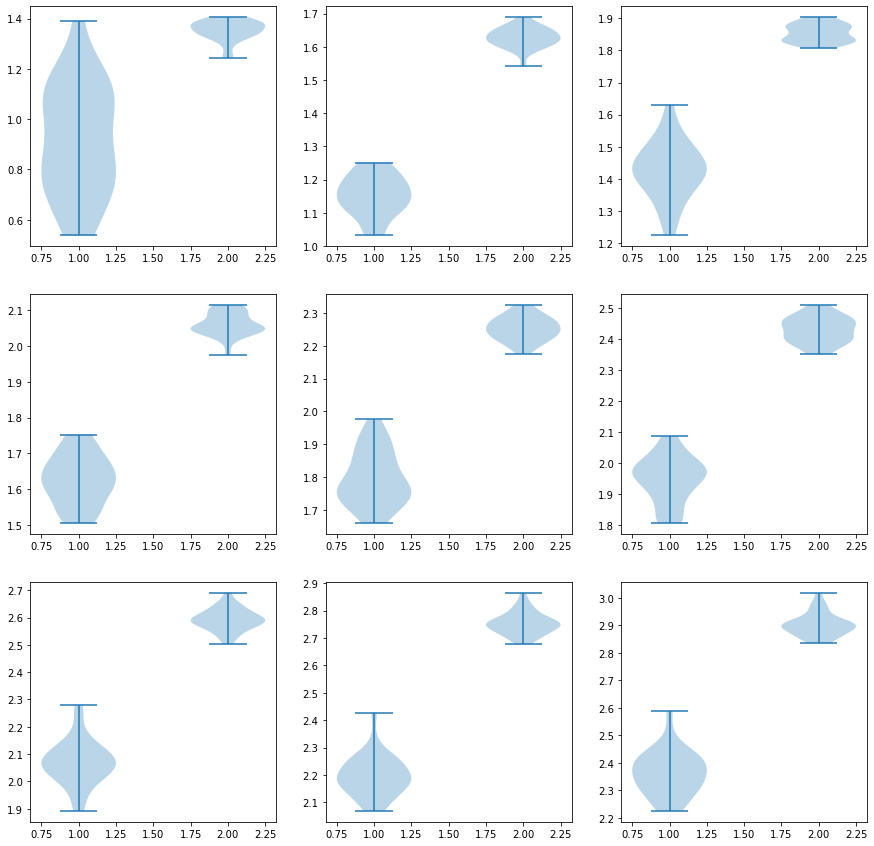

In [59]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(d_orth.shape[1]):
    a = ax[np.unravel_index(i, (3, 3))]
    a.violinplot([d_orth[:, i, 0], d_orth[:, i, 1]])

### Peanut

In [19]:
fpath = '/mnt/Secondary/data/peanut/data_dict_peanut_day14.obj'

In [8]:
dat = load_peanut(fpath, epoch=2, spike_threshold=200, bin_width=25, 
                  filter_fn='none')

In [20]:
# Run on a few different dimensions to get the minimum distance to orthogonal matrix
dim_vals = np.arange(2, 11)
epochs = np.arange(2, 18, 2)
d_orth_peanut = np.zeros((epochs.size, dim_vals.size, 2))
for i, epoch in tqdm(enumerate(epochs)):
    dat = load_peanut(fpath, epoch=epoch, spike_threshold=200, bin_width=25, 
                    filter_fn='none')
    X = np.squeeze(dat['spike_rates'])
    for j, dim in enumerate(dim_vals):
        dcamodel = DCA(T=3, d=dim)
        dcamodel.fit(X)
        pcamodel = PCA().fit(X)

        Xdca = X @ dcamodel.coef_
        Xpca = X @ pcamodel.components_.T[:, 0:dim]

        varmodel = VAR(estimator='ols', order=1)
        varmodel.fit(Xdca)
        A = form_companion(varmodel.coef_)
        U, S, Vh = np.linalg.svd(A)
        d_orth_peanut[i, j, 0] = np.linalg.norm(A - U @ Vh)
    
        varmodel = VAR(estimator='ols', order=1)
        varmodel.fit(Xpca)

        A = form_companion(varmodel.coef_)
        U, S, Vh = np.linalg.svd(A)
        d_orth_peanut[i, j, 1] = np.linalg.norm(A - U @ Vh)


Rows of VAR matrix processed: 2it [00:00, 1908.24it/s]
Rows of VAR matrix processed: 2it [00:00, 2519.10it/s]
Rows of VAR matrix processed: 3it [00:00, 1831.84it/s]
Rows of VAR matrix processed: 3it [00:00, 2288.63it/s]
Rows of VAR matrix processed: 4it [00:00, 1908.45it/s]
Rows of VAR matrix processed: 4it [00:00, 2099.78it/s]
Rows of VAR matrix processed: 5it [00:00, 1652.86it/s]
Rows of VAR matrix processed: 5it [00:00, 1722.79it/s]
Rows of VAR matrix processed: 6it [00:00, 1597.42it/s]
Rows of VAR matrix processed: 6it [00:00, 1630.54it/s]
Rows of VAR matrix processed: 7it [00:00, 1604.64it/s]
Rows of VAR matrix processed: 7it [00:00, 1609.66it/s]
Rows of VAR matrix processed: 8it [00:00, 1386.78it/s]
Rows of VAR matrix processed: 8it [00:00, 1224.26it/s]
Rows of VAR matrix processed: 9it [00:00, 1291.92it/s]
Rows of VAR matrix processed: 9it [00:00, 1267.88it/s]
Rows of VAR matrix processed: 10it [00:00, 913.71it/s]
Rows of VAR matrix processed: 10it [00:00, 952.02it/s]
Rows of VA

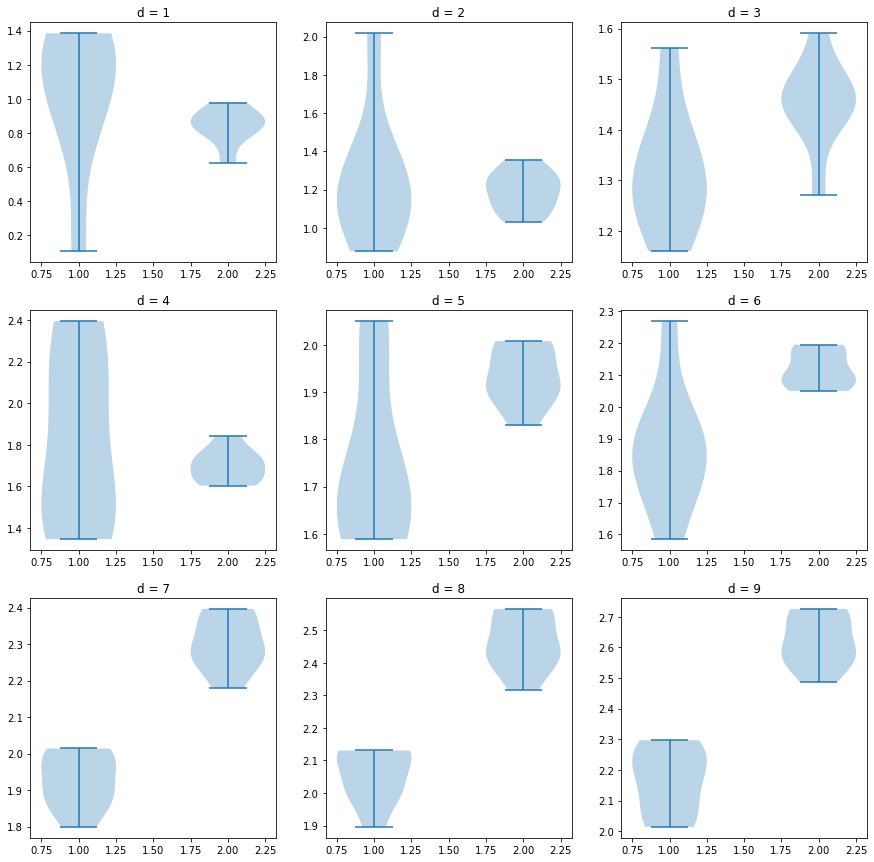

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(d_orth_peanut.shape[1]):
    a = ax[np.unravel_index(i, (3, 3))]
    a.violinplot([d_orth_peanut[:, i, 0], d_orth_peanut[:, i, 1]])
    a.set_title('d = %d' % (i + 1))

### Artificial Networks

In [8]:
# Switch to the RNN kernel
import numpy as np
import matplotlib.pyplot as plt
import scipy
from rnn_analysis.rnn import RNN
from rnn_analysis.lyapunov import calc_lyapunov
import torch
import pdb

In [2]:
from scipy.stats import bernoulli
from tqdm import tqdm

In [3]:
num_nodes = 100
W = np.random.uniform(0, 1/(2 * np.sqrt(10)), size=(num_nodes, num_nodes))

# Set excitatory and inhibitory neurons
inhibitory_prob = 0.4
connectivity_matrix = np.eye(num_nodes)
for i in range(num_nodes):
    if bernoulli.rvs(inhibitory_prob):
        connectivity_matrix[i, i] = -1
W = connectivity_matrix @ W



In [11]:
# Initialize an RNN according to Dale's Law, and show that the the dynamics along DCA directions are more orthogonal than PCA directions
num_networks = 10
ntrajectories = 10

num_nodes = 100

# Store the trajectories away
trajectories = []

for i in tqdm(range(num_networks)):

    trajectories.append([])

    # Rejection sample until we get a stable dynamics matrix
    W = np.random.uniform(0, 1/(2 * np.sqrt(num_nodes)), size=(num_nodes, num_nodes))

    # Set excitatory and inhibitory neurons
    inhibitory_prob = 0.2
    connectivity_matrix = np.eye(num_nodes)
    for k in range(num_nodes):
        if bernoulli.rvs(inhibitory_prob):
            connectivity_matrix[k, k] = -1
    W = connectivity_matrix @ W

    while max(np.abs(np.linalg.eigvals(W))) > 0.8:
        # Rejection sample until we get a stable dynamics matrix
        W = np.random.uniform(0, 1/(2 * np.sqrt(num_nodes)), size=(num_nodes, num_nodes))

        # Set excitatory and inhibitory neurons
        inhibitory_prob = 0.2
        connectivity_matrix = np.eye(num_nodes)
        for k in range(num_nodes):
            if bernoulli.rvs(inhibitory_prob):
                connectivity_matrix[k, k] = -1
        W = connectivity_matrix @ W

    rnn = RNN(W, activation_func=torch.tanh, timestep=0.01, input_weight_matrix=np.eye(num_nodes))

    for j in range(ntrajectories):

        T = 100
        x, _ = rnn.simulate(T, inputs=torch.tensor(np.random.normal(scale=0.25, size=(int(T//0.01), num_nodes)), dtype=torch.float))
        x = x.detach().numpy()
        


        if np.any(np.isnan(x)) or np.any(np.isinf(x)):
            pdb.set_trace()
            raise ValueError

        trajectories[i].append(x)


100%|██████████| 10/10 [01:50<00:00, 11.07s/it]


In [7]:
import pickle

In [13]:
# Save so we can switch kernels
with open('rnn_trajectories.dat', 'wb') as f:
    f.write(pickle.dumps(trajectories))

In [8]:
with open('rnn_trajectories.dat', 'rb') as f:
    trajectories = pickle.load(f)

In [9]:
trajectories = np.array(trajectories)

In [10]:
# Run on a few different dimensions to get the minimum distance to orthogonal matrix
dim_vals = np.arange(2, 11)
d_orth_rnn = np.zeros((trajectories.shape[0], trajectories.shape[1], dim_vals.size, 2))
for i1 in tqdm(range(trajectories.shape[0])):
    for i2 in range(trajectories.shape[1]):
        X = trajectories[i1, i2]
        for j, dim in enumerate(dim_vals):
            dcamodel = DCA(T=5, d=dim)
            dcamodel.fit(X)
            pcamodel = PCA().fit(X)

            Xdca = X @ dcamodel.coef_
            Xpca = X @ pcamodel.components_.T[:, 0:dim]

            varmodel = VAR(estimator='ols', order=1)
            varmodel.fit(Xdca)
            A = form_companion(varmodel.coef_)
            U, S, Vh = np.linalg.svd(A)
            d_orth_rnn[i1, i2, j, 0] = np.linalg.norm(A - U @ Vh)
        
            varmodel = VAR(estimator='ols', order=1)
            varmodel.fit(Xpca)

            A = form_companion(varmodel.coef_)
            U, S, Vh = np.linalg.svd(A)
            d_orth_rnn[i1, i2, j, 1] = np.linalg.norm(A - U @ Vh)


Rows of VAR matrix processed: 2it [00:00, 1841.63it/s]
Rows of VAR matrix processed: 2it [00:00, 2353.05it/s]
Rows of VAR matrix processed: 3it [00:00, 2030.81it/s]
Rows of VAR matrix processed: 3it [00:00, 2367.88it/s]
Rows of VAR matrix processed: 4it [00:00, 2035.33it/s]
Rows of VAR matrix processed: 4it [00:00, 2281.99it/s]
Rows of VAR matrix processed: 5it [00:00, 2270.87it/s]
Rows of VAR matrix processed: 5it [00:00, 1726.48it/s]
Rows of VAR matrix processed: 6it [00:00, 2192.34it/s]
Rows of VAR matrix processed: 6it [00:00, 2321.78it/s]
Rows of VAR matrix processed: 7it [00:00, 1644.09it/s]
Rows of VAR matrix processed: 7it [00:00, 1957.86it/s]
Rows of VAR matrix processed: 8it [00:00, 1940.80it/s]
Rows of VAR matrix processed: 8it [00:00, 1770.87it/s]
Rows of VAR matrix processed: 9it [00:00, 1796.53it/s]
Rows of VAR matrix processed: 9it [00:00, 1669.63it/s]
Rows of VAR matrix processed: 10it [00:00, 1206.79it/s]
Rows of VAR matrix processed: 10it [00:00, 1347.44it/s]
Rows of 

In [14]:
d_orth_rnn = np.reshape(d_orth_rnn, (-1, 9, 2))

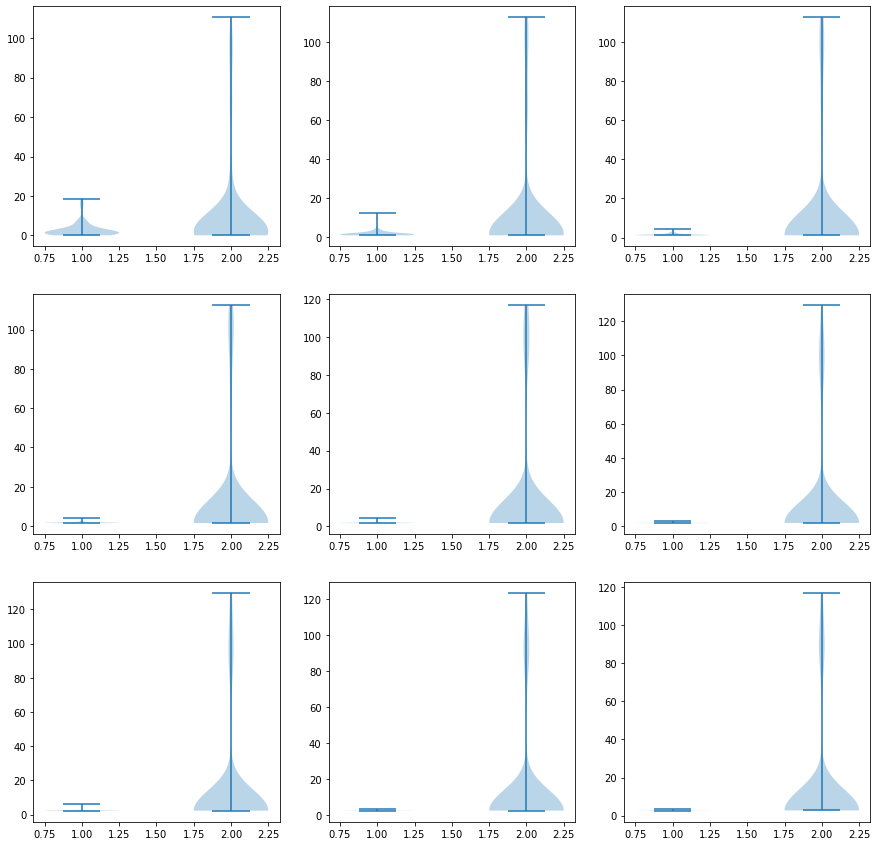

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(d_orth_rnn.shape[1]):
    a = ax[np.unravel_index(i, (3, 3))]
    a.violinplot([d_orth_rnn[..., i, 0], d_orth_rnn[..., i, 1]])

In [21]:
## Save away
with open('d_orth.dat', 'wb') as f:
    f.write(pickle.dumps(d_orth_sabes))
    f.write(pickle.dumps(d_orth_peanut))
    f.write(pickle.dumps(d_orth_rnn))

### Plotting

In [31]:
import seaborn as sns

In [36]:
box_dict

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddb770af90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddb7714890>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fddb774f750>,
 'medians': [<matplotlib.lines.Line2D at 0x7fddb771f150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fddb771f5d0>,
 'means': []}

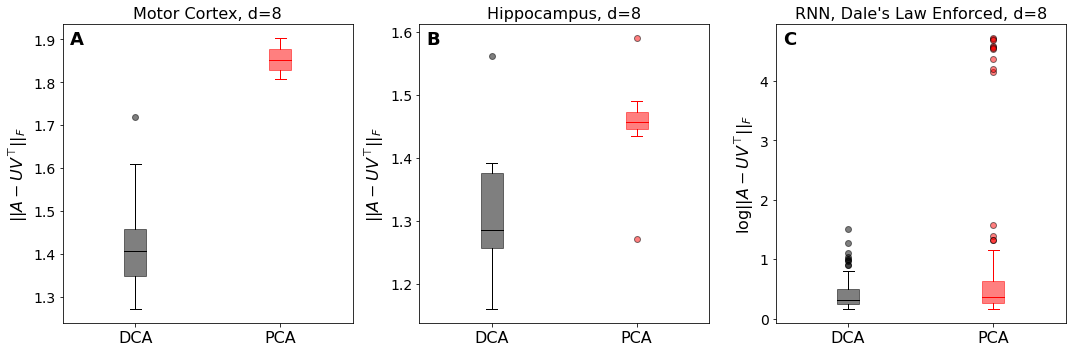

In [56]:
fig,  ax = plt.subplots(1, 3, figsize=(15, 5))

# Choose d=3
d = 3

colors = ['black', 'red']

box_dict = ax[0].boxplot([d_orth_sabes[:, d-1, 0], d_orth_sabes[:, d-1, 1]],
                         patch_artist=True)
for item in ['boxes']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color, alpha=0.5)

for item in ['fliers']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color, markerfacecolor=color, alpha=0.5)

for item in ['medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)

# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

box_dict = ax[1].boxplot([d_orth_peanut[:, d-1, 0], d_orth_peanut[:, d-1, 1]],
                         patch_artist=True)
for item in ['boxes']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color, alpha=0.5)

for item in ['fliers']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color, markerfacecolor=color, alpha=0.5)

for item in ['medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)

# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)


box_dict = ax[2].boxplot([np.log(d_orth_rnn[:, d-1, 0]), np.log(d_orth_rnn[:, d-1, 1])],
                         patch_artist=True)
for item in ['boxes']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color, alpha=0.5)

for item in ['fliers']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color, markerfacecolor=color, alpha=0.5)

for item in ['medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)

# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

ax[0].set_xticklabels(['DCA', 'PCA'], fontsize=16)
ax[1].set_xticklabels(['DCA', 'PCA'], fontsize=16)
ax[2].set_xticklabels(['DCA', 'PCA'], fontsize=16)

ax[0].set_ylabel(r'$||A - UV^\top||_F$', fontsize=16)
ax[1].set_ylabel(r'$||A - UV^\top||_F$', fontsize=16)
ax[2].set_ylabel(r'$\log||A - UV^\top||_F$', fontsize=16)

ax[0].tick_params(axis='y', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[2].tick_params(axis='y', labelsize=14)

ax[0].set_title('Motor Cortex, d=8', fontsize=16)
ax[1].set_title('Hippocampus, d=8', fontsize=16)
ax[2].set_title("RNN, Dale's Law Enforced, d=8", fontsize=16)

ax[0].text(0.025, 0.98, 'A', transform=ax[0].transAxes,
           fontsize=18, fontweight='bold', va='top')    
ax[1].text(0.025, 0.98, 'B', transform=ax[1].transAxes,
           fontsize=18, fontweight='bold', va='top')    
ax[2].text(0.025, 0.98, 'C', transform=ax[2].transAxes,
           fontsize=18, fontweight='bold', va='top')    


fig.tight_layout()
fig.savefig('dist_orth.pdf', bbox_inches='tight', pad_inches=0)